In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [3]:
df_business = pd.read_json('../../data/business.json',lines=True)
df_checkin = pd.read_json('../../data/checkin.json', lines=True)

## 2. Exploratory Data Analysis (EDA)

In [4]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [6]:
df_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [7]:
df_business = df_business.dropna()

In [8]:
df_business['review_count'] = df_business['review_count'].fillna(0)

In [9]:
df_business['stars'] = df_business['stars'].fillna(0)

In [10]:
df_business.describe()

,is_open,latitude,longitude,review_count,stars
count,129268.000000,129268.000000,129268.000000,129268.000000,129268.000000
mean,0.843565,38.348179,-97.976657,44.508370,3.712644
std,0.363268,4.867658,16.625511,131.780404,0.934989
min,0.000000,33.204642,-115.477519,3.000000,1.000000
25%,1.000000,33.625583,-112.272915,6.000000,3.000000
50%,1.000000,36.127674,-111.790583,13.000000,4.000000
75%,1.000000,43.112978,-80.037140,36.000000,4.500000
max,1.000000,51.296592,-72.945050,8348.000000,5.000000


In [11]:
stars = df_business.groupby('stars').mean()

In [12]:
stars.corr()

,is_open,latitude,longitude,review_count
is_open,1.000000,-0.886744,-0.864017,-0.575509
latitude,-0.886744,1.000000,0.995357,0.413856
longitude,-0.864017,0.995357,1.000000,0.366235
review_count,-0.575509,0.413856,0.366235,1.000000


In [13]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129268 entries, 1 to 192608
Data columns (total 14 columns):
address         129268 non-null object
attributes      129268 non-null object
business_id     129268 non-null object
categories      129268 non-null object
city            129268 non-null object
hours           129268 non-null object
is_open         129268 non-null int64
latitude        129268 non-null float64
longitude       129268 non-null float64
name            129268 non-null object
postal_code     129268 non-null object
review_count    129268 non-null int64
stars           129268 non-null float64
state           129268 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 14.8+ MB


In [14]:
numeric_features = df_business.loc[:, ['latitude', 'longitude', 'review_count', 'stars']]

In [15]:
numeric_features_standardized = (numeric_features)/numeric_features.max()

In [ ]:
ax = sns.pairplot(numeric_features_standardized)
plt.show()

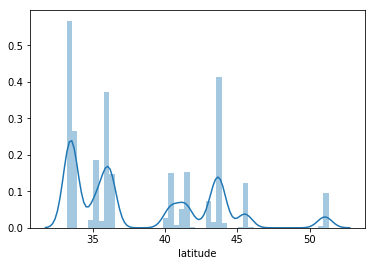

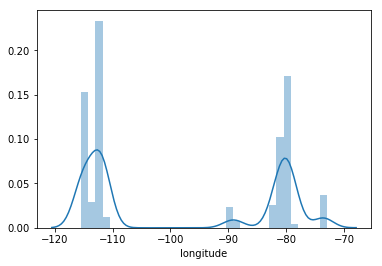

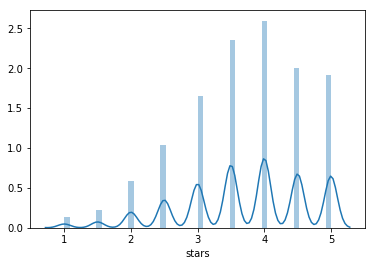

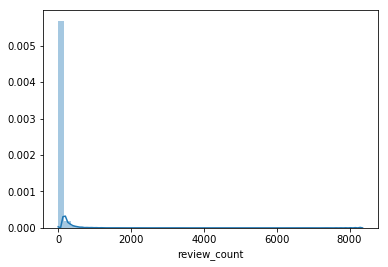

In [15]:
ax = sns.distplot(df_business['latitude'])
plt.show()
ax = sns.distplot(df_business['longitude'])
plt.show()
ax = sns.distplot(df_business['stars'])
plt.show()
ax = sns.distplot(df_business['review_count'])
plt.show()

In [16]:
business_df["stars"].value_counts()

4.0    26830
3.5    24301
4.5    20761
5.0    19854
3.0    17020
2.5    10756
2.0     6033
1.5     2258
1.0     1455
Name: stars, dtype: int64

In [17]:
checkin_df.info()

#with open('../../dataset/checkin.json', 'rb') as f:
#    data = f.readlines()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161950 entries, 0 to 161949
Data columns (total 2 columns):
business_id    161950 non-null object
date           161950 non-null object
dtypes: object(2)
memory usage: 2.5+ MB


In [18]:
checkin_df.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [ ]:
#from datetime import datetime
#datetime_object = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [19]:
def get_checkin_count(x):
    return len(x.split(", "))

checkin_df['checkin_count'] = checkin_df['date'].apply(get_checkin_count)

In [20]:
checkin_df.head()

,business_id,date,checkin_count
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016...",6
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012...",167
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015...",180
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30,1
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010...",37


In [21]:
len(checkin_df["checkin_count"].unique())

2884

In [22]:
df_merged = pd.merge(business_df, checkin_df, on='business_id', how='left')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129268 entries, 0 to 129267
Data columns (total 16 columns):
address          129268 non-null object
attributes       129268 non-null object
business_id      129268 non-null object
categories       129268 non-null object
city             129268 non-null object
hours            129268 non-null object
is_open          129268 non-null int64
latitude         129268 non-null float64
longitude        129268 non-null float64
name             129268 non-null object
postal_code      129268 non-null object
review_count     129268 non-null int64
stars            129268 non-null float64
state            129268 non-null object
date             113701 non-null object
checkin_count    113701 non-null float64
dtypes: float64(4), int64(2), object(10)
memory usage: 16.8+ MB


In [23]:
df_merged.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,date,checkin_count
0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,"2010-07-05 16:56:31, 2010-12-21 20:30:01, 2010...",455.0
1,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,"2010-11-13 01:00:36, 2010-12-19 00:49:15, 2011...",721.0
2,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC,NaN,NaN
3,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON,"2014-03-31 21:46:17, 2015-01-27 19:05:03, 2018...",3.0
4,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV,"2011-05-21 22:20:31, 2011-10-05 21:34:47, 2012...",11.0


In [24]:
df_merged[['checkin_count']] = df_merged[['checkin_count']].fillna(0)

In [25]:
df_merged.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,date,checkin_count
0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,"2010-07-05 16:56:31, 2010-12-21 20:30:01, 2010...",455.0
1,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,"2010-11-13 01:00:36, 2010-12-19 00:49:15, 2011...",721.0
2,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC,NaN,0.0
3,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON,"2014-03-31 21:46:17, 2015-01-27 19:05:03, 2018...",3.0
4,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV,"2011-05-21 22:20:31, 2011-10-05 21:34:47, 2012...",11.0


In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129268 entries, 0 to 129267
Data columns (total 16 columns):
address          129268 non-null object
attributes       129268 non-null object
business_id      129268 non-null object
categories       129268 non-null object
city             129268 non-null object
hours            129268 non-null object
is_open          129268 non-null int64
latitude         129268 non-null float64
longitude        129268 non-null float64
name             129268 non-null object
postal_code      129268 non-null object
review_count     129268 non-null int64
stars            129268 non-null float64
state            129268 non-null object
date             113701 non-null object
checkin_count    129268 non-null float64
dtypes: float64(4), int64(2), object(10)
memory usage: 16.8+ MB


In [28]:
new_df = df_merged[['business_id','review_count', 'stars', 'checkin_count', 'city', 'state', 'categories']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129268 entries, 0 to 129267
Data columns (total 7 columns):
business_id      129268 non-null object
review_count     129268 non-null int64
stars            129268 non-null float64
checkin_count    129268 non-null float64
city             129268 non-null object
state            129268 non-null object
categories       129268 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 7.9+ MB


In [30]:
new_df['stars'] = new_df['stars'].round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
new_df['stars'].value_counts()

4.0    71892
5.0    19854
2.0    19047
3.0    17020
1.0     1455
Name: stars, dtype: int64

In [32]:
new_df['review_count']=new_df['review_count'].fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['review_count', 'checkin_count']
#new_df[cols_to_norm] = new_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
dict_scaler = {}
for col_to_norm in cols_to_norm:
    scaler = StandardScaler()
    scaler.fit(new_df.loc[:,col_to_norm].values.reshape(-1, 1))
    new_df.loc[:,col_to_norm] = scaler.transform(new_df.loc[:,col_to_norm].values.reshape(-1, 1))
    dict_scaler[col_to_norm] = scaler  

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [54]:
from sklearn import preprocessing
cols_str_to_int = ['state', 'city']
for col_str_to_int in cols_str_to_int:
    label_encoder = preprocessing.LabelEncoder()
    new_df[col_str_to_int] = label_encoder.fit_transform(new_df[col_str_to_int])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [55]:
new_df.head()

,business_id,review_count,stars,checkin_count,city,state,categories
0,QXAEGFB4oINsVuTFxEYKFQ,0.633569,2.0,0.398021,481,16,"Specialty Food, Restaurants, Dim Sum, Imported..."
1,gnKjwL_1w79qoiV3IC_xQQ,0.952282,4.0,0.726081,129,10,"Sushi Bars, Restaurants, Japanese"
2,HhyxOkGAM07SRYtlQ4wMFQ,-0.307394,4.0,-0.163135,129,10,"Plumbing, Shopping, Local Services, Home Servi..."
3,68dUKd8_8liJ7in4aWOSEA,-0.314983,2.0,-0.159435,481,16,"Shipping Centers, Couriers & Delivery Services..."
4,gbQN7vr_caG_A1ugSmGhWg,-0.314983,4.0,-0.149568,366,13,"Hair Salons, Hair Stylists, Barbers, Men's Hai..."


In [71]:
categories = set((''.join(new_df['categories'].tolist())).strip().split(', '))
len(categories)

48663

In [72]:
categories

{'MediterraneanLaundromat',
 'Traditional Chinese MedicineRestaurants',
 'IrishRestaurants',
 'Kebab',
 'TiresBreweries',
 'Home & GardenDentists',
 'BistrosChinese',
 'Smog Check StationsGeneral Dentistry',
 'VegetarianHome & Garden',
 'MassageDrugstores',
 'Gold Buyers',
 'American (New)Kids Hair Salons',
 'AcupunctureMexican',
 'Gold BuyersAuto Repair',
 'Chicken ShopBed & Breakfast',
 'Massage TherapyCasinos',
 'Venues & Event SpacesBurgers',
 'Cosmetics & Beauty SupplyMedical Centers',
 'Mobile Home DealersFashion',
 'Hair RemovalPacking Supplies',
 'Home ServicesWeb Design',
 'Custom CakesOffice Cleaning',
 'AutomotiveBoot Camps',
 'Fast FoodLaundry Services',
 'NightlifePreschools',
 'FoodBikes',
 'Videos & Video Game RentalSelf Storage',
 'Hungarian',
 'Shoe StoresAuto Repair',
 'Occupational TherapyCaterers',
 'Event Planning & ServicesTree Services',
 'Walk-in ClinicsShopping',
 'FlooringBeauty & Spas',
 'Farming Equipment',
 'BreweriesGeneral Dentistry',
 'PizzaPlumbing',
 '

#### TODO: one-hot encoding
due to limited computational resource, the categorical feature one-hot encoding is put into the todo list.

Text feature extraction https://scikit-learn.org/stable/modules/feature_extraction.html

In [56]:
X = new_df[['review_count', 'checkin_count', 'city', 'state']]
y = new_df[['stars']]

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129268 entries, 0 to 129267
Data columns (total 4 columns):
review_count     129268 non-null float64
checkin_count    129268 non-null float64
city             129268 non-null int64
state            129268 non-null int64
dtypes: float64(2), int64(2)
memory usage: 4.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129268 entries, 0 to 129267
Data columns (total 1 columns):
stars    129268 non-null float64
dtypes: float64(1)
memory usage: 2.0 MB
